#Tipos de Dados

In [167]:
import pandas as pd

In [168]:
dados = pd.read_csv('dados.csv')

In [169]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Qualitativa Ordinal

In [170]:
dados['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13])

Qualitativa Nominal

In [171]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

Quantitivas discretas

In [172]:
dados.Idade.min()

13

In [173]:
dados.Idade.max()

99

Quantitivas contínuas

In [174]:
dados.Altura.min()

1.339244614

In [175]:
dados.Altura.max()

2.028496765

#Distribuição de frequências

##Método 1

In [176]:
dados.Sexo.value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [177]:
dados.Sexo.value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [178]:
frequencia = dados.Sexo.value_counts()

In [179]:
percentual = dados.Sexo.value_counts(normalize = True) * 100

In [180]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [181]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [182]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis=1, inplace = True)

In [183]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


##Método 2

In [184]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [185]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc='mean', values= dados.Renda)

frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


##Distribuição de frequências para variáveis quantitativas

In [186]:
dados.Renda.min()

0

In [187]:
dados.Renda.max()

200000

In [188]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [189]:
labels = ['E', 'D', 'C', 'B', 'A']

In [190]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [191]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [192]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True),
    normalize = True
) * 100

percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [193]:
dist_freq_quantitativas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


##Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)

In [194]:
import numpy as np

In [195]:
#REGRA DE STURGES

n = dados.shape[0]

k = 1 + 10 / 3 * np.log10(n)
k

17.285291187298853

In [196]:
k = int(k.round(0))
k

17

In [197]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [198]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True 
    ),
    sort = False,
    normalize = True
) * 100

percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

In [199]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


##Histogramas

In [200]:
import seaborn as sns

<ipython-input-201-6bf3ae3ad493>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura, kde = False)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros'>

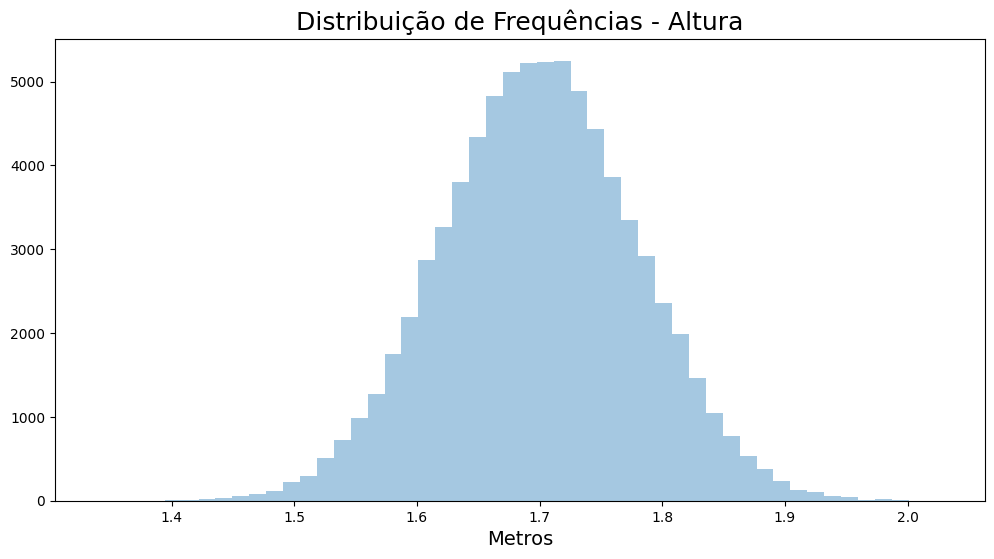

In [201]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<ipython-input-202-316b2c598edf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

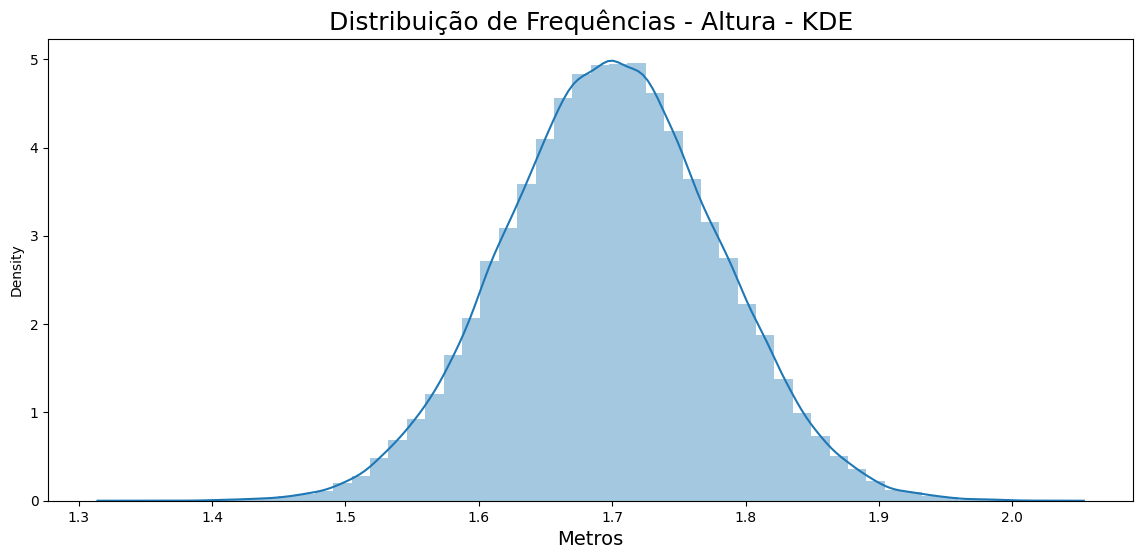

In [202]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: >

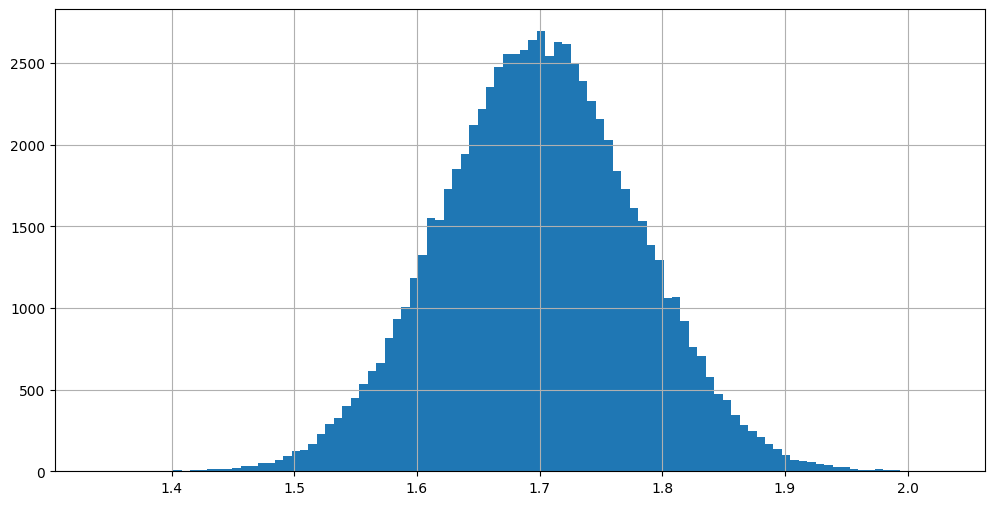

In [203]:
dados.Altura.hist(bins = 100, figsize=(12, 6))

<Axes: >

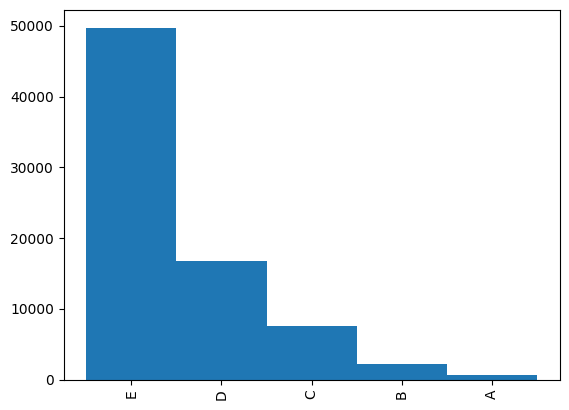

In [204]:
dist_freq_quantitativas['Frequência'].plot.bar(width = 1)